In [1]:
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.neighbors import NearestNeighbors

colors = {
    'blue': '#00549F',
    'blue_75': '#407FB7',
    'blue_50': '#8EBAE5',
    'blue_25': '#C7DDF2',
    'blue_10': '#E8F1FA',

    'black': '#000000',
    'black_75': '#646567',
    'black_50': '#9C9E9F',
    'black_25': '#CFD1D2',
    'black_10': '#ECEDED',

    'magenta': '#E30066',
    'magenta_75': '#E96088',
    'magenta_50': '#F19EB1',
    'magenta_25': '#F9D2DA',
    'magenta_10': '#FDEEF0',

    'yellow': '#FFED00',
    'yellow_75': '#FFF055',
    'yellow_50': '#FFF59B',
    'yellow_25': '#FFFAD1',
    'yellow_10': '#FFFDEE',

    'petrol': '#006165',
    'petrol_75': '#2D7F83',
    'petrol_50': '#7DA4A7',
    'petrol_25': '#BFD0D1',
    'petrol_10': '#E6ECEC',

    'turquoise': '#0098A1',
    'turquoise_75': '#00B1B7',
    'turquoise_50': '#89CCCF',
    'turquoise_25': '#CAE7E7',
    'turquoise_10': '#EBF6F6',

    'green': '#57AB27',
    'green_75': '#8DC060',
    'green_50': '#B8D698',
    'green_25': '#DDEBCE',
    'green_10': '#F2F7EC',

    'lime': '#BDCD00',
    'lime_75': '#D0D95C',
    'lime_50': '#E0E69A',
    'lime_25': '#F0F3D0',
    'lime_10': '#F9FAED',

    'orange': '#F6A800',
    'orange_75': '#FABE50',
    'orange_50': '#FDD48F',
    'orange_25': '#FEEAC9',
    'orange_10': '#FFF7EA',

    'red': '#CC071E',
    'red_75': '#D85C41',
    'red_50': '#E69679',
    'red_25': '#F3CDBB',
    'red_10': '#FAEBE3',

    'bordeaux': '#A11035',
    'bordeaux_75': '#B65256',
    'bordeaux_50': '#CD8B87',
    'bordeaux_25': '#E5C5C0',
    'bordeaux_10': '#F5E8E5',

    'purple': '#612158',
    'purple_75': '#834E75',
    'purple_50': '#A8859E',
    'purple_25': '#D2C0CD',
    'purple_10': '#EDE5EA',

    'lila': '#7A6FAC',
    'lila_75': '#9B91C1',
    'lila_50': '#BCB5D7',
    'lila_25': '#DEDAEB',
    'lila_10': '#F2F0F7',
}


def plot_data_three(X, l, save_fig=None, save_format="png", show=False, cluster_marker_size=10, cluster_marker_density=1,
              noise_marker_size=20):
    fig = plt.figure()
    #cmap = mcolors.ListedColormap([colors["purple"], colors["red"], colors["green"], colors["orange"]])
    #cmap = mcolors.ListedColormap(['dimgray','mediumvioletred', 'orange','navy', 'gold'])#colors["blue"]
    cmap = mcolors.ListedColormap([colors["black_10"], colors["bordeaux"], colors["blue"] , colors["lime"]])
    plt.scatter(
        X[:, 0][l != -1][::cluster_marker_density],
        X[:, 1][l != -1][::cluster_marker_density],
        s=cluster_marker_size,
        c=l[l != -1][::cluster_marker_density],
        vmin=-1,
        vmax=len(np.unique(l)),
        cmap=cmap,
    )
    plt.scatter(X[:, 0][l == -1], X[:, 1][l == -1], s=noise_marker_size, c=l[l == -1], vmin=-1, vmax=3, cmap=cmap,
                marker="+", alpha=0.8)
    plt.xticks([])
    plt.yticks([])
    if save_fig:
        plt.savefig(f"{save_fig}v2.{save_format}", format=save_format, dpi=300, bbox_inches="tight", pad_inches=0)
    if show:
        plt.show()
    return fig

def plot_data(X, l, save_fig=None, save_format="png", show=False, cluster_marker_size=10, cluster_marker_density=1,
              noise_marker_size=20):
    fig = plt.figure()
    #cmap = mcolors.ListedColormap([colors["purple"], colors["red"], colors["green"], colors["orange"]])
    #cmap = mcolors.ListedColormap(['dimgray','mediumvioletred', 'orange','navy', 'gold'])#colors["blue"]
    cmap = mcolors.ListedColormap([colors["black_10"], colors["bordeaux"], colors["blue"] , colors["lime"], colors["magenta"], colors["orange"], colors["red"], colors["lila"], colors["yellow"],colors["purple"]])
    plt.scatter(
        X[:, 0][l != -1][::cluster_marker_density],
        X[:, 1][l != -1][::cluster_marker_density],
        s=cluster_marker_size,
        c=l[l != -1][::cluster_marker_density],
        vmin=-1,
        vmax=len(np.unique(l)),
        cmap=cmap,
    )
    plt.scatter(X[:, 0][l == -1], X[:, 1][l == -1], s=noise_marker_size, c=l[l == -1], vmin=-1, vmax=3, cmap=cmap,
                marker="+", alpha=0.8)
    plt.xticks([])
    plt.yticks([])
    if save_fig:
        plt.savefig(f"{save_fig}v2.{save_format}", format=save_format, dpi=300, bbox_inches="tight", pad_inches=0)
    if show:
        plt.show()
    return fig


def calc_scores(X, l):
    def get_score(eval_metric):
        try:
            return f"{eval_metric.__name__}: {round(eval_metric(X, l), 2)}"
        except:
            pass

    from src.utils.metrics import METRICS
    for name in METRICS.keys():
        METRICS[name].__name__ = name
    results = {}
    for metric in METRICS.values():
        try:
            if metric.__name__ == 'CDBW':
                results[metric.__name__] = round(metric(X, l), 5)  #
            else:
                results[metric.__name__] = round(metric(X, l), 2)
        except:
            pass
    # results = []
    #for result in results:
    #    print(result)
    return results


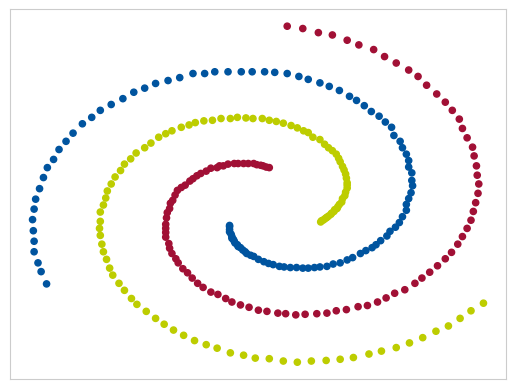

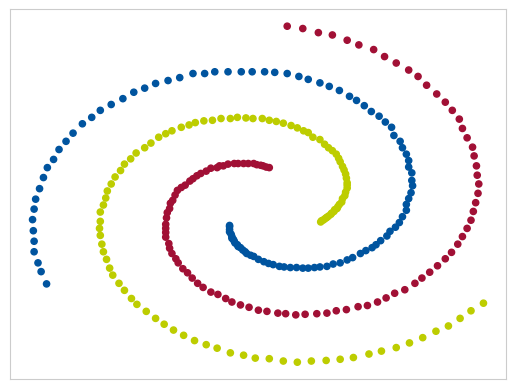

In [2]:
from datasets.density_datasets import Datasets as DensityDatasets


X_threespiral, l_threespiral = DensityDatasets.three_spiral.standardized_data_cached_no_noise
l_threespiral = np.array([int(l-1) for l in l_threespiral])
plot_data_three(X_threespiral, l_threespiral, cluster_marker_size=20, save_fig="imgs/threespiral_Tab2")

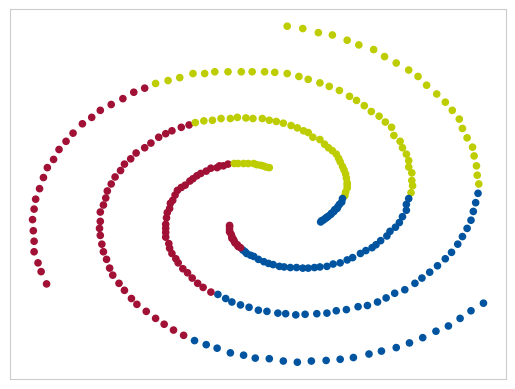

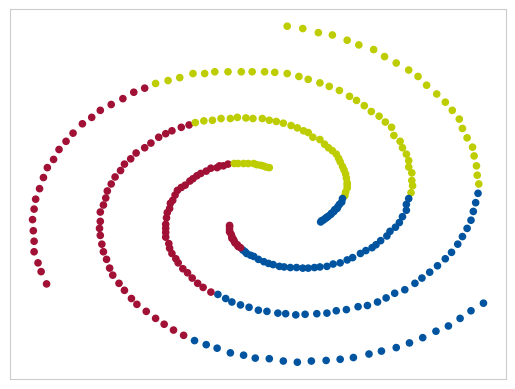

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_threespiral)
l_threespiral_kmeans = kmeans.labels_
plot_data_three(X_threespiral, l_threespiral_kmeans, cluster_marker_size=20, save_fig="imgs/threespiral_kmeans_Tab2")


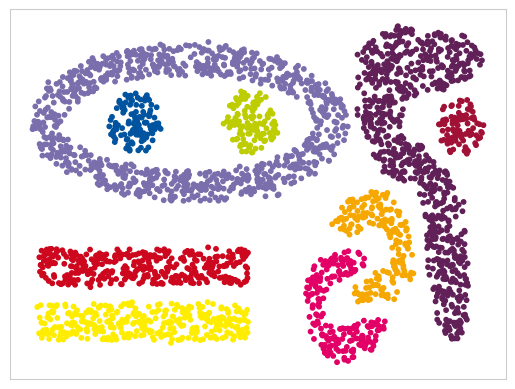

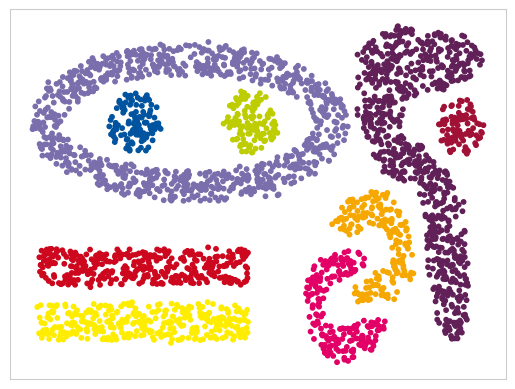

In [4]:
X_complex9, l_complex9 = DensityDatasets.complex9.standardized_data_cached_no_noise
plot_data(X_complex9, l_complex9, save_fig="imgs/Complex9_Tab2")

/Users/lena/Documents/Projects/PycharmProjects/DISCO/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lena/Documents/Projects/PycharmProjects/DISCO/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lena/Documents/Projects/PycharmProjects/DISCO/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lena/Documents/Projects/PycharmProjects/DISCO/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/lena/Documents/Projects/PycharmProjects/DISCO/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/lena/Docu

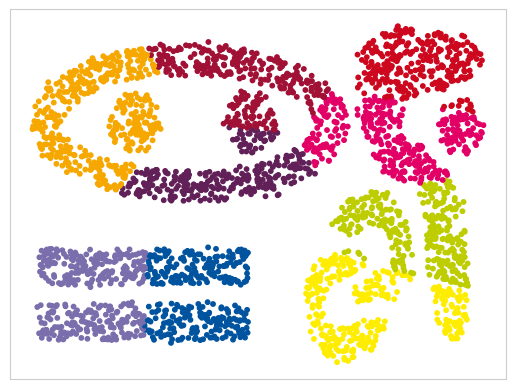

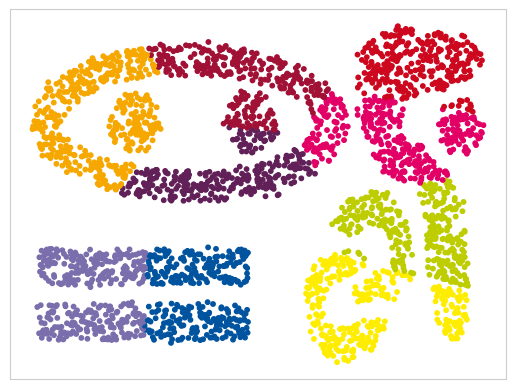

In [5]:
X_complex9, l_complex9 = DensityDatasets.complex9.standardized_data_cached_no_noise
kmeans = KMeans(n_clusters=9, random_state=0, n_init="auto").fit(X_complex9)
l_complex9_kmeans = kmeans.labels_
plot_data(X_complex9, l_complex9_kmeans, save_fig="imgs/Complex9_kmeans_Tab2")